# Building final dataframes and EDA

In [1]:
# import modules
import re
import pandas as pd
import numpy as np
from nltk.collocations import *
from nltk import FreqDist, word_tokenize, regexp_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
from nltk.corpus import gutenberg, stopwords
from nltk.collocations import *
from nltk import FreqDist
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

/Users/roberthillery/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Read in dataframes

In [2]:

# these are the NYT best seller list
nyt_2016_df = pd.read_csv('csv_files/nyt_2016_df.csv')
nyt_2017_df = pd.read_csv('csv_files/nyt_2017_df.csv')
nyt_2018_df = pd.read_csv('csv_files/nyt_2018_df')

# these are all of our books
gr_2016_df = pd.read_csv('csv_files/goodreads_2016_df.csv')
gr_2017_df = pd.read_csv('csv_files/goodreads_2017_df.csv')
gr_2018_df = pd.read_csv('csv_files/goodreads_2018_df.csv')

## Merge thte NYT Bestseller dataframes

In [3]:
nyt_2018_df.shape

(100, 10)

In [4]:
nyt_2016_df.head()

,author,description,format,genre,month,pages,publisher,rating,title,year
0,Yaa Gyasi,A novel of breathtaking sweep and emotional po...,Hardcover,Historical,June,320,Alfred A. Knopf,4.42,Homegoing,2016
1,Colson Whitehead,Cora is a slave on a cotton plantation in Geor...,Hardcover,Historical,August,306,Doubleday Books,4.03,The Underground Railroad,2016
2,Paul Kalanithi,"For readers of Atul Gawande, Andrew Solomon, a...",Kindle Edition,Nonfiction,January,208,Random House (first p...,4.34,When Breath Becomes Air,2016
3,Matthew Desmond,<b><i>New York Times </i>Bestseller<br/><br/>F...,Hardcover,Nonfiction,March,418,Crown,4.49,Evicted: Poverty and Profit in the American City,2016
4,Ian McGuire,LONGLISTED FOR THE MAN BOOKER PRIZE 2016,Hardcover,Historical,March,272,Henry Holt and Co. (f...,4.00,The North Water,2016


In [5]:
nyt_2017_df.head()

,author,description,format,genre,month,pages,publisher,rating,title,year
0,David Grann,"In the 1920s, the richest people per capita in...",ebook,Nonfiction,April,359,Doubleday,4.11,Killers of the Flower Moon: The Osage Murders ...,2017.0
1,George Saunders,"In his long-awaited first novel, American mast...",Hardcover,Fiction,February,343,Random House,3.79,Lincoln in the Bardo,2017.0
2,Min Jin Lee,<i>Pachinko</i>,Hardcover,Historical,February,489,Grand Central Publishing,4.26,Pachinko,2017.0
3,Mohsin Hamid,In a country teetering on the brink of civil w...,Hardcover,Fiction,March,231,Riverhead (first publ...,3.81,Exit West,2017.0
4,Ali Smith,Autumn. Season of mists and mellow fruitfulnes...,Hardcover,Fiction,February,263,Pantheon Books (first...,3.72,Autumn,2016.0


In [6]:
nyt_2018_df.head()

,author,description,format,genre,month,pages,publisher,rating,title,year
0,Michael Ondaatje,In a narrative as mysterious as memory itself ...,Paperback,Historical,June,304,Jonathan Cape (first ...,3.73,Warlight,2018.0
1,Tayari Jones,Newlyweds Celestial and Roy are the embodiment...,Hardcover,Fiction,February,308,Algonquin Books (firs...,4.01,An American Marriage,2018.0
2,Tommy Orange,"Fierce, angry, funny, heartbreaking—Tommy Oran...",Hardcover,Fiction,June,294,Knopf,4.07,There There,2018.0
3,Lisa Halliday,A singularly inventive and unforgettable debut...,Hardcover,Fiction,February,277,Simon & Schuster,3.60,Asymmetry,2018.0
4,Richard Powers,An Air Force loadmaster in the Vietnam War is ...,Hardcover,Fiction,April,502,W. W. Norton & Company,4.25,The Overstory,2018.0


In [7]:
# put it together
nyt_df = pd.concat([nyt_2016_df, nyt_2017_df, nyt_2018_df])

In [8]:
nyt_df.shape

(300, 10)

In [9]:
nyt_df 

,author,description,format,genre,month,pages,publisher,rating,title,year
0,Yaa Gyasi,A novel of breathtaking sweep and emotional po...,Hardcover,Historical,June,320,Alfred A. Knopf,4.42,Homegoing,2016.0
1,Colson Whitehead,Cora is a slave on a cotton plantation in Geor...,Hardcover,Historical,August,306,Doubleday Books,4.03,The Underground Railroad,2016.0
2,Paul Kalanithi,"For readers of Atul Gawande, Andrew Solomon, a...",Kindle Edition,Nonfiction,January,208,Random House (first p...,4.34,When Breath Becomes Air,2016.0
3,Matthew Desmond,<b><i>New York Times </i>Bestseller<br/><br/>F...,Hardcover,Nonfiction,March,418,Crown,4.49,Evicted: Poverty and Profit in the American City,2016.0
4,Ian McGuire,LONGLISTED FOR THE MAN BOOKER PRIZE 2016,Hardcover,Historical,March,272,Henry Holt and Co. (f...,4.00,The North Water,2016.0
5,Han Kang,"Before the nightmare, Yeong-hye and her husban...",Hardcover,Fiction,February,188,Hogarth Press (first ...,3.58,The Vegetarian,2007.0
6,Karan Mahajan,FINALIST FOR THE NATIONAL BOOK AWARD 2016,Hardcover,Fiction,March,288,Viking,3.57,The Association of Small Bombs,2016.0
7,Ann Patchett,<strong>#1 <em>New York Times </em>Bestseller<...,Hardcover,Fiction,September,336,Harper,3.81,Commonwealth,2016.0
8,Elizabeth Strout,The profound mother-daughter bond is explored ...,Hardcover,Fiction,January,193,Random House (first p...,3.51,My Name Is Lucy Barton,2016.0
9,Zadie Smith,Two brown girls dream of being dancers--but on...,Hardcover,Fiction,November,453,Hamish Hamilton,3.57,Swing Time,2016.0


In [10]:
#df[df.duplicated(['ID'], keep=False)]

# this is to test
title_df = nyt_df[nyt_df.duplicated(['title'], keep=False)]

In [11]:
nyt_df

,author,description,format,genre,month,pages,publisher,rating,title,year
0,Yaa Gyasi,A novel of breathtaking sweep and emotional po...,Hardcover,Historical,June,320,Alfred A. Knopf,4.42,Homegoing,2016.0
1,Colson Whitehead,Cora is a slave on a cotton plantation in Geor...,Hardcover,Historical,August,306,Doubleday Books,4.03,The Underground Railroad,2016.0
2,Paul Kalanithi,"For readers of Atul Gawande, Andrew Solomon, a...",Kindle Edition,Nonfiction,January,208,Random House (first p...,4.34,When Breath Becomes Air,2016.0
3,Matthew Desmond,<b><i>New York Times </i>Bestseller<br/><br/>F...,Hardcover,Nonfiction,March,418,Crown,4.49,Evicted: Poverty and Profit in the American City,2016.0
4,Ian McGuire,LONGLISTED FOR THE MAN BOOKER PRIZE 2016,Hardcover,Historical,March,272,Henry Holt and Co. (f...,4.00,The North Water,2016.0
5,Han Kang,"Before the nightmare, Yeong-hye and her husban...",Hardcover,Fiction,February,188,Hogarth Press (first ...,3.58,The Vegetarian,2007.0
6,Karan Mahajan,FINALIST FOR THE NATIONAL BOOK AWARD 2016,Hardcover,Fiction,March,288,Viking,3.57,The Association of Small Bombs,2016.0
7,Ann Patchett,<strong>#1 <em>New York Times </em>Bestseller<...,Hardcover,Fiction,September,336,Harper,3.81,Commonwealth,2016.0
8,Elizabeth Strout,The profound mother-daughter bond is explored ...,Hardcover,Fiction,January,193,Random House (first p...,3.51,My Name Is Lucy Barton,2016.0
9,Zadie Smith,Two brown girls dream of being dancers--but on...,Hardcover,Fiction,November,453,Hamish Hamilton,3.57,Swing Time,2016.0


In [12]:
title_df.shape

(22, 10)

In [13]:
nyt_df = nyt_df.drop_duplicates(subset='title')#, keep="last")

In [14]:
nyt_df.shape[0]

289

### Merge best seller dataframe with all books dataframe

In [15]:
nyt_df.head()

,author,description,format,genre,month,pages,publisher,rating,title,year
0,Yaa Gyasi,A novel of breathtaking sweep and emotional po...,Hardcover,Historical,June,320,Alfred A. Knopf,4.42,Homegoing,2016.0
1,Colson Whitehead,Cora is a slave on a cotton plantation in Geor...,Hardcover,Historical,August,306,Doubleday Books,4.03,The Underground Railroad,2016.0
2,Paul Kalanithi,"For readers of Atul Gawande, Andrew Solomon, a...",Kindle Edition,Nonfiction,January,208,Random House (first p...,4.34,When Breath Becomes Air,2016.0
3,Matthew Desmond,<b><i>New York Times </i>Bestseller<br/><br/>F...,Hardcover,Nonfiction,March,418,Crown,4.49,Evicted: Poverty and Profit in the American City,2016.0
4,Ian McGuire,LONGLISTED FOR THE MAN BOOKER PRIZE 2016,Hardcover,Historical,March,272,Henry Holt and Co. (f...,4.00,The North Water,2016.0


In [16]:
# add column for Bestseller
nyt_df.shape


(289, 10)

In [17]:
# add in target feature
nyt_df['best_seller'] = 1

/Users/roberthillery/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
nyt_df

,author,description,format,genre,month,pages,publisher,rating,title,year,best_seller
0,Yaa Gyasi,A novel of breathtaking sweep and emotional po...,Hardcover,Historical,June,320,Alfred A. Knopf,4.42,Homegoing,2016.0,1
1,Colson Whitehead,Cora is a slave on a cotton plantation in Geor...,Hardcover,Historical,August,306,Doubleday Books,4.03,The Underground Railroad,2016.0,1
2,Paul Kalanithi,"For readers of Atul Gawande, Andrew Solomon, a...",Kindle Edition,Nonfiction,January,208,Random House (first p...,4.34,When Breath Becomes Air,2016.0,1
3,Matthew Desmond,<b><i>New York Times </i>Bestseller<br/><br/>F...,Hardcover,Nonfiction,March,418,Crown,4.49,Evicted: Poverty and Profit in the American City,2016.0,1
4,Ian McGuire,LONGLISTED FOR THE MAN BOOKER PRIZE 2016,Hardcover,Historical,March,272,Henry Holt and Co. (f...,4.00,The North Water,2016.0,1
5,Han Kang,"Before the nightmare, Yeong-hye and her husban...",Hardcover,Fiction,February,188,Hogarth Press (first ...,3.58,The Vegetarian,2007.0,1
6,Karan Mahajan,FINALIST FOR THE NATIONAL BOOK AWARD 2016,Hardcover,Fiction,March,288,Viking,3.57,The Association of Small Bombs,2016.0,1
7,Ann Patchett,<strong>#1 <em>New York Times </em>Bestseller<...,Hardcover,Fiction,September,336,Harper,3.81,Commonwealth,2016.0,1
8,Elizabeth Strout,The profound mother-daughter bond is explored ...,Hardcover,Fiction,January,193,Random House (first p...,3.51,My Name Is Lucy Barton,2016.0,1
9,Zadie Smith,Two brown girls dream of being dancers--but on...,Hardcover,Fiction,November,453,Hamish Hamilton,3.57,Swing Time,2016.0,1


In [19]:
# this is making the dataframe with all the books

choiceawards_df = pd.concat([gr_2016_df, gr_2017_df, gr_2018_df])

In [20]:
choiceawards_df.shape

(1220, 10)

In [21]:
doubled_books_df = choiceawards_df[choiceawards_df.duplicated(['title'], keep=False)]

In [22]:
doubled_books_df.shape


(96, 10)

In [23]:
choiceawards_df = choiceawards_df.drop_duplicates(subset='title')#, keep="last")

In [24]:
choiceawards_df.shape

(1171, 10)

In [25]:
# set best seller feature to false
choiceawards_df['best_seller'] = 0

In [26]:
choiceawards_df

,author,description,format,genre,month,pages,publisher,rating,title,year,best_seller
0,Liane Moriarty,Six responsible adults. Three cute kids. One s...,Hardcover,Fiction,July,415,Flatiron Books,3.56,Truly Madly Guilty,2016.0,0
1,Bryn Greenwood,"As the daughter of a meth dealer, Wavy knows n...",Hardcover,Fiction,August,346,Thomas Dunne Books,4.07,All the Ugly and Wonderful Things,2016.0,0
2,Emma Cline,"Northern California, during the violent end of...",Hardcover,Fiction,June,355,Random House,3.47,The Girls,2016.0,0
3,Cynthia D'Aprix Sweeney,"<i>A warm, funny and acutely perceptive debut ...",Hardcover,Fiction,March,368,Ecco,3.42,The Nest,2016.0,0
4,Jodi Picoult,Ruth Jefferson is a labor and delivery nurse a...,Hardcover,Fiction,October,480,Ballantine Books,4.35,Small Great Things,2016.0,0
5,Curtis Sittenfeld,This version of the Bennet family and Mr. Darc...,Hardcover,Fiction,April,492,Random House,3.61,Eligible,2016.0,0
6,Ann Patchett,<strong>#1 <em>New York Times </em>Bestseller<...,Hardcover,Fiction,September,336,Harper,3.81,Commonwealth,2016.0,0
7,Steven Rowley,Combining the emotional depth of,Hardcover,Fiction,June,307,Simon Schuster,3.72,Lily and the Octopus,2016.0,0
8,Elizabeth Strout,The profound mother-daughter bond is explored ...,Hardcover,Fiction,January,193,Random House (first p...,3.51,My Name Is Lucy Barton,2016.0,0
9,Helen Oyeyemi,"The key to a house, the key to a heart, the ke...",Hardcover,Short Stories,March,325,Riverhead Books,3.63,What is Not Yours is Not Yours,2016.0,0


In [27]:
all_books = pd.concat([choiceawards_df, nyt_df])
all_books.shape
# all_books nyt best sellers and all the books from good reads so there are duplicates

(1460, 11)

In [28]:
all_books

,author,description,format,genre,month,pages,publisher,rating,title,year,best_seller
0,Liane Moriarty,Six responsible adults. Three cute kids. One s...,Hardcover,Fiction,July,415,Flatiron Books,3.56,Truly Madly Guilty,2016.0,0
1,Bryn Greenwood,"As the daughter of a meth dealer, Wavy knows n...",Hardcover,Fiction,August,346,Thomas Dunne Books,4.07,All the Ugly and Wonderful Things,2016.0,0
2,Emma Cline,"Northern California, during the violent end of...",Hardcover,Fiction,June,355,Random House,3.47,The Girls,2016.0,0
3,Cynthia D'Aprix Sweeney,"<i>A warm, funny and acutely perceptive debut ...",Hardcover,Fiction,March,368,Ecco,3.42,The Nest,2016.0,0
4,Jodi Picoult,Ruth Jefferson is a labor and delivery nurse a...,Hardcover,Fiction,October,480,Ballantine Books,4.35,Small Great Things,2016.0,0
5,Curtis Sittenfeld,This version of the Bennet family and Mr. Darc...,Hardcover,Fiction,April,492,Random House,3.61,Eligible,2016.0,0
6,Ann Patchett,<strong>#1 <em>New York Times </em>Bestseller<...,Hardcover,Fiction,September,336,Harper,3.81,Commonwealth,2016.0,0
7,Steven Rowley,Combining the emotional depth of,Hardcover,Fiction,June,307,Simon Schuster,3.72,Lily and the Octopus,2016.0,0
8,Elizabeth Strout,The profound mother-daughter bond is explored ...,Hardcover,Fiction,January,193,Random House (first p...,3.51,My Name Is Lucy Barton,2016.0,0
9,Helen Oyeyemi,"The key to a house, the key to a heart, the ke...",Hardcover,Short Stories,March,325,Riverhead Books,3.63,What is Not Yours is Not Yours,2016.0,0


## fix for publishers with messy names

In [29]:
# some publishers have extra info after their names 
all_books.loc[:,['publisher']]

,publisher
0,Flatiron Books
1,Thomas Dunne Books
2,Random House
3,Ecco
4,Ballantine Books
5,Random House
6,Harper
7,Simon Schuster
8,Random House (first p...
9,Riverhead Books


In [30]:
publishers = all_books['publisher']
len(publishers)


1460

In [31]:
publishers.iloc[8]

'Random House                          (first published January 6th 2016'

In [32]:
clean_publishers = []
for i in publishers:
    clean_publishers.append(i.split('   ')[0])

In [33]:
len(clean_publishers)

1460

In [34]:
type(clean_publishers)

list

In [35]:
all_books['publisher'] = clean_publishers

In [36]:
len(all_books['publisher'].unique())

398

## more_than_one_df checks to see where the duplicate books are

In [37]:
more_than_one_df = all_books[all_books.duplicated(['title'], keep=False)]

In [38]:
more_than_one_df.shape

(174, 11)

In [39]:
more_than_one_df

,author,description,format,genre,month,pages,publisher,rating,title,year,best_seller
6,Ann Patchett,<strong>#1 <em>New York Times </em>Bestseller<...,Hardcover,Fiction,September,336,Harper,3.81,Commonwealth,2016.0,0
8,Elizabeth Strout,The profound mother-daughter bond is explored ...,Hardcover,Fiction,January,193,Random House,3.51,My Name Is Lucy Barton,2016.0,0
10,Jacqueline Woodson,Running into a long-ago friend sets memories f...,Hardcover,Fiction,August,177,Amistad,3.86,Another Brooklyn,2016.0,0
11,Jonathan Safran Foer,<b>A monumental new novel from the bestselling...,Hardcover,Fiction,September,592,"Farrar, Straus and Giroux",3.64,Here I Am,2016.0,0
12,Richard Russo,"Richard Russo, at the very top of his game, no...",Hardcover,Fiction,May,477,Knopf,4.08,Everybody's Fool,2016.0,0
13,Nathan Hill,A hilarious and deeply touching debut novel ab...,Hardcover,Fiction,August,640,Knopf,4.09,The Nix,2016.0,0
15,Karan Mahajan,FINALIST FOR THE NATIONAL BOOK AWARD 2016,Hardcover,Fiction,March,288,Viking,3.57,The Association of Small Bombs,2016.0,0
16,Ian McEwan,<b>Nutshell is a classic story of murder and d...,Hardcover,Fiction,September,208,Nan A. Talese,3.69,Nutshell,2016.0,0
20,Stephen King,The spectacular finale to the New York Times b...,Hardcover,Horror,June,432,Scribner,4.09,End of Watch,2016.0,0
25,Noah Hawley,"On a foggy summer night, eleven people—ten pri...",Hardcover,Fiction,May,391,Grand Central Publishing,3.74,Before the Fall,2016.0,0


In [40]:
more_than_one_df[more_than_one_df['title'].str.contains("Small Fry")==True]

,author,description,format,genre,month,pages,publisher,rating,title,year,best_seller
194,Lisa Brennan-Jobs,Born on a farm and named in a field by her par...,Hardcover,Nonfiction,September,383,Grove Press,3.94,Small Fry,2018.0,0
96,Lisa Brennan-Jobs,Born on a farm and named in a field by her par...,Hardcover,Nonfiction,September,383,Grove Press,3.94,Small Fry,2018.0,1


In [41]:
# There are 

In [42]:
all_books = all_books.drop_duplicates(subset='title', keep='last')

In [43]:
# this is to cheack that the Small Fry that was not on the bestseller list was dropped
all_books[all_books['title'].str.contains("Small Fry")==True]

,author,description,format,genre,month,pages,publisher,rating,title,year,best_seller
96,Lisa Brennan-Jobs,Born on a farm and named in a field by her par...,Hardcover,Nonfiction,September,383,Grove Press,3.94,Small Fry,2018.0,1


In [44]:
check_double = all_books[all_books.duplicated(['title'], keep=False)]

In [45]:
check_double.shape

(0, 11)

In [46]:
# all_books as the nyt best sellers and non best seller labeled with 1 and 0



In [47]:
all_books.shape

(1373, 11)

In [48]:
all_books.head(15)

,author,description,format,genre,month,pages,publisher,rating,title,year,best_seller
0,Liane Moriarty,Six responsible adults. Three cute kids. One s...,Hardcover,Fiction,July,415,Flatiron Books,3.56,Truly Madly Guilty,2016.0,0
1,Bryn Greenwood,"As the daughter of a meth dealer, Wavy knows n...",Hardcover,Fiction,August,346,Thomas Dunne Books,4.07,All the Ugly and Wonderful Things,2016.0,0
2,Emma Cline,"Northern California, during the violent end of...",Hardcover,Fiction,June,355,Random House,3.47,The Girls,2016.0,0
3,Cynthia D'Aprix Sweeney,"<i>A warm, funny and acutely perceptive debut ...",Hardcover,Fiction,March,368,Ecco,3.42,The Nest,2016.0,0
4,Jodi Picoult,Ruth Jefferson is a labor and delivery nurse a...,Hardcover,Fiction,October,480,Ballantine Books,4.35,Small Great Things,2016.0,0
5,Curtis Sittenfeld,This version of the Bennet family and Mr. Darc...,Hardcover,Fiction,April,492,Random House,3.61,Eligible,2016.0,0
7,Steven Rowley,Combining the emotional depth of,Hardcover,Fiction,June,307,Simon Schuster,3.72,Lily and the Octopus,2016.0,0
9,Helen Oyeyemi,"The key to a house, the key to a heart, the ke...",Hardcover,Short Stories,March,325,Riverhead Books,3.63,What is Not Yours is Not Yours,2016.0,0
14,Jung Yun,<b>Why should a man care for his parents when ...,Hardcover,Fiction,March,326,Picador,3.73,Shelter,2016.0,0
17,Bette Lee Crosby,On the day Jennifer Green was born a pile of s...,Kindle Edition,Fiction,September,248,Bent Pine Publishing,4.23,Silver Threads,2016.0,0


In [49]:
all_books.columns

Index(['author', 'description', 'format', 'genre', 'month', 'pages',
       'publisher', 'rating', 'title', 'year', 'best_seller'],
      dtype='object')

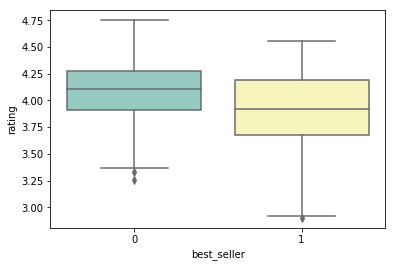

In [50]:
ax = sns.boxplot(x=all_books["best_seller"], y=all_books['rating'], 
                    data=all_books, palette="Set3")


/Users/roberthillery/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


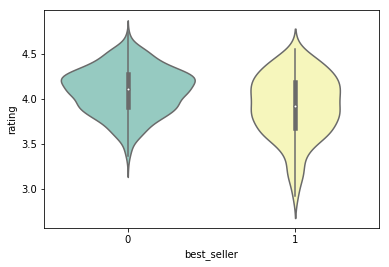

In [51]:
axv = sns.violinplot(x=all_books["best_seller"], y=all_books['rating'], 
                    data=all_books, palette="Set3")


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2286c978>,
      dtype=object)

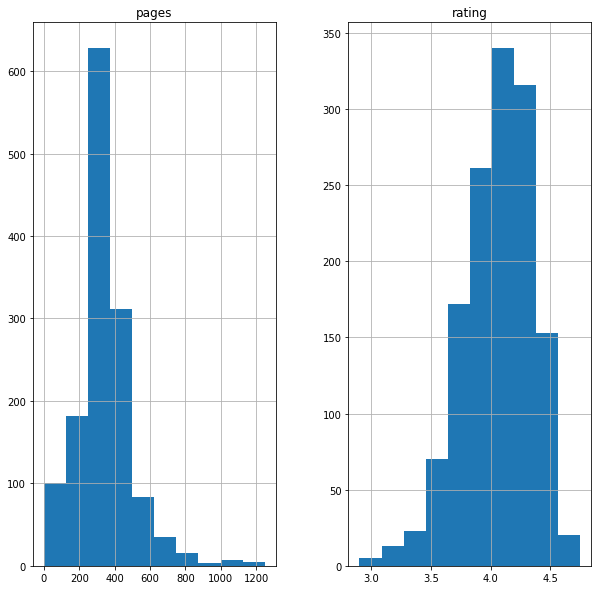

In [52]:
# look at distribution of continuous variables
all_books.hist(column=['pages', 'rating'], figsize=(10,10))


In [53]:
# double check the numbers for this graph
#all_books['genre']

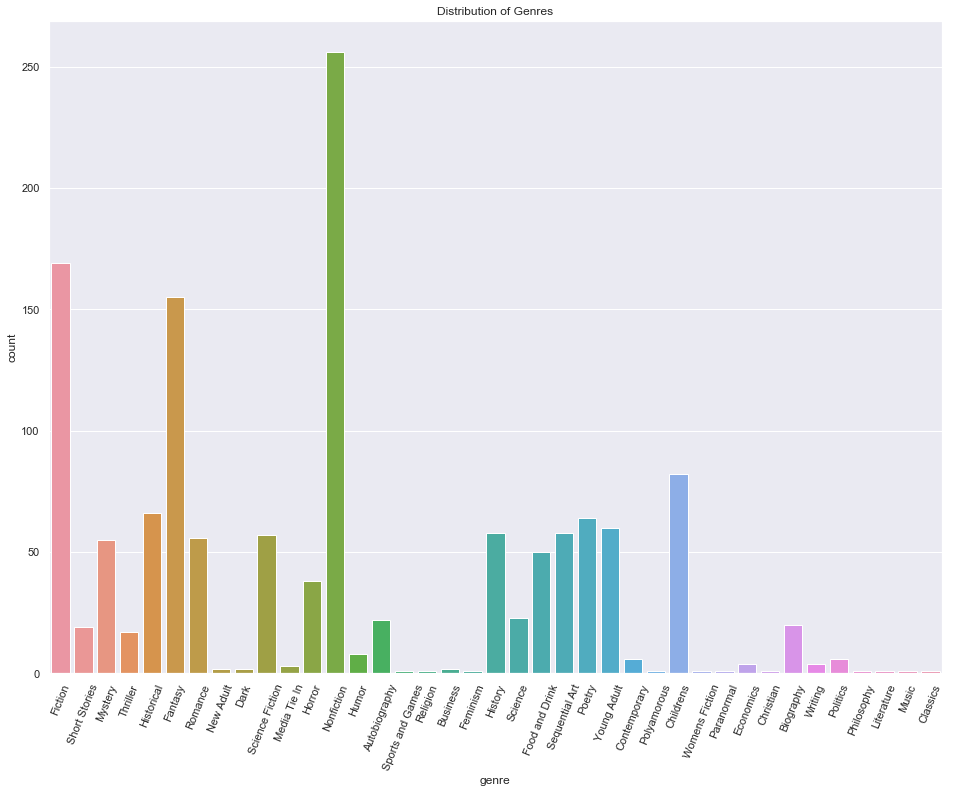

In [54]:
# this plot is for all books, bestsellers and not
sns.set(rc={'figure.figsize':(16,12)})
sns.countplot(all_books['genre'],label="Count", )
plt.xticks(rotation=68)
plt.title('Distribution of Genres')
plt.show()

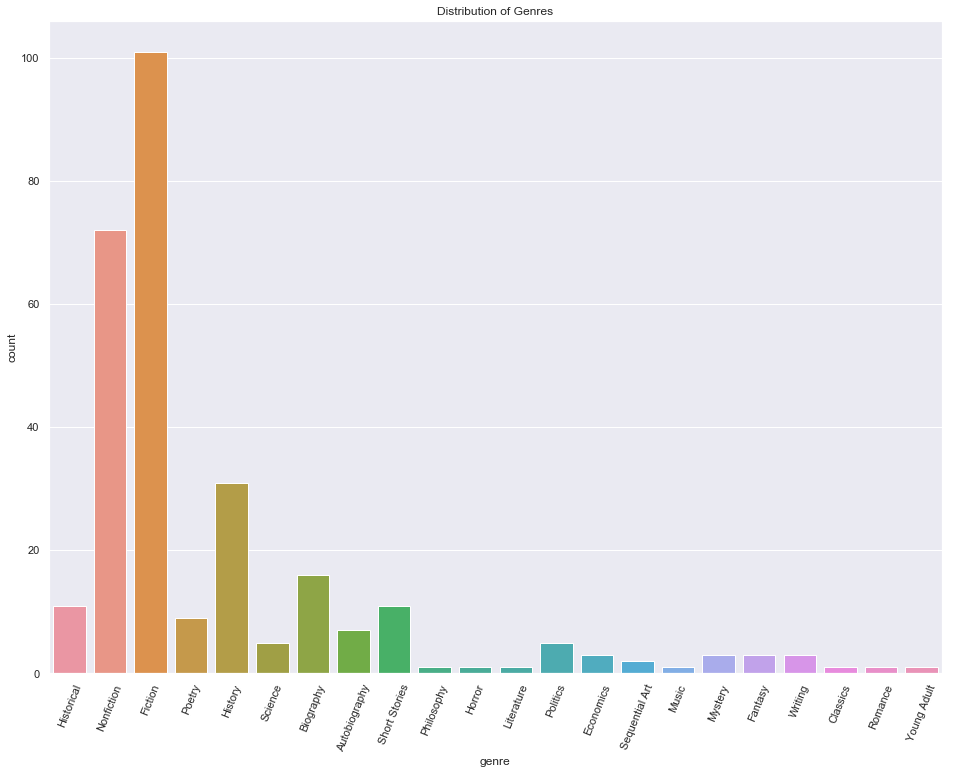

In [55]:
# this plot is for all books, bestsellers and not
sns.set(rc={'figure.figsize':(16,12)})
sns.countplot(nyt_df['genre'],label="Count", )
plt.xticks(rotation=68)
plt.title('Distribution of Genres')
plt.show()

# Look for catrgorical variables

### Going to make dummies in order of
- genre
- month
- format 
- year (not sure on this one)
- publishers (might add)

These are sequential, so in order to change one, make sure to check what was before it.
The final dataframe (df) stops at format for now.

In [56]:
# Dummies for genre
genres = all_books['genre'].astype('category')

# Make dummies out of the genres feature & drop the first one
genres_dummies = pd.get_dummies(genres, drop_first=True)

# Drop the genre feature from the original dataframe since we now are replacing it with dummies
dropped_genres = all_books.drop(['genre'], axis=1)
# there are 38 categories

# Tie the dummies to the original dataframe
genres_df = pd.concat([dropped_genres, genres_dummies], axis = 1)

In [57]:
genres_df.shape

(1373, 48)

In [58]:
# Dummies for month
months = genres_df['month'].astype('category')

# Make dummies out of the months feature & drop the first one
months_dummies = pd.get_dummies(months, drop_first=True)

# Drop the month feature from the original dataframe since we now are replacing it with dummies
dropped_months = genres_df.drop(['month'], axis=1)

# Tie the dummies to the original dataframe
months_df = pd.concat([dropped_months, months_dummies], axis = 1)

In [59]:
months_df.shape

(1373, 59)

In [60]:
# Dummies for format
formats = months_df['format'].astype('category')

# Make dummies out of the months feature & drop the first one
formats_dummies = pd.get_dummies(formats, drop_first=True)

# Drop the month feature from the original dataframe since we now are replacing it with dummies
dropped_formats = months_df.drop(['format'], axis=1)

# Tie the dummies to the original dataframe
formats_df = pd.concat([dropped_formats, formats_dummies], axis = 1)

In [61]:
formats_df.shape

(1373, 65)

In [62]:
# Dummies for year
years = formats_df['year'].astype('category')

# Make dummies out of the months feature & drop the first one
years_dummies = pd.get_dummies(years, drop_first=True)

# Drop the month feature from the original dataframe since we now are replacing it with dummies
dropped_years = formats_df.drop(['year'], axis=1)

# Tie the dummies to the original dataframe
years_df = pd.concat([dropped_years, years_dummies], axis = 1)

In [63]:
years_df.shape

(1373, 79)

In [64]:
# Dummies for publishers
# can change formats_df to years_df depending on what we want to keep
publishers = formats_df['publisher'].astype('category')

# Make dummies out of the months feature & drop the first one
publishers_dummies = pd.get_dummies(publishers, drop_first=True)

# Drop the month feature from the original dataframe since we now are replacing it with dummies
# will also have to change formats_df here
dropped_publishers = formats_df.drop(['publisher'], axis=1)

# Tie the dummies to the original dataframe
publishers_df = pd.concat([dropped_publishers, publishers_dummies], axis = 1)

In [65]:
publishers_df.shape

(1373, 461)

In [66]:
# might want to find the top publishers then make a categorical variable on that

In [67]:
df = formats_df

In [68]:
df.shape

(1373, 65)

In [69]:
df.columns

Index(['author', 'description', 'pages', 'publisher', 'rating', 'title',
       'year', 'best_seller', 'Biography', 'Business', 'Childrens',
       'Christian', 'Classics', 'Contemporary', 'Dark', 'Economics', 'Fantasy',
       'Feminism', 'Fiction', 'Food and Drink', 'Historical', 'History',
       'Horror', 'Humor', 'Literature', 'Media Tie In', 'Music', 'Mystery',
       'New Adult', 'Nonfiction', 'Paranormal', 'Philosophy', 'Poetry',
       'Politics', 'Polyamorous', 'Religion', 'Romance', 'Science',
       'Science Fiction', 'Sequential Art', 'Short Stories',
       'Sports and Games', 'Thriller', 'Womens Fiction', 'Writing',
       'Young Adult', 'April', 'August', 'December', 'February', 'January',
       'July', 'June', 'March', 'May', 'November', 'October', 'September',
       'Hardcover', 'Kindle Edition', 'Library Binding',
       'Mass Market Paperback', 'Paperback', 'Trade Paperback', 'ebook'],
      dtype='object')

In [70]:
df.head()

,author,description,pages,publisher,rating,title,year,best_seller,Biography,Business,...,November,October,September,Hardcover,Kindle Edition,Library Binding,Mass Market Paperback,Paperback,Trade Paperback,ebook
0,Liane Moriarty,Six responsible adults. Three cute kids. One s...,415,Flatiron Books,3.56,Truly Madly Guilty,2016.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,Bryn Greenwood,"As the daughter of a meth dealer, Wavy knows n...",346,Thomas Dunne Books,4.07,All the Ugly and Wonderful Things,2016.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Emma Cline,"Northern California, during the violent end of...",355,Random House,3.47,The Girls,2016.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,Cynthia D'Aprix Sweeney,"<i>A warm, funny and acutely perceptive debut ...",368,Ecco,3.42,The Nest,2016.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Jodi Picoult,Ruth Jefferson is a labor and delivery nurse a...,480,Ballantine Books,4.35,Small Great Things,2016.0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


# Clean up descriptions

### Tokenize it by TESTING the nyt best seller data frame

In [71]:
first_desc = nyt_df.iloc[3, 1]

In [72]:
for i in range(nyt_df.shape[0]):
    print(nyt_df.iloc[i, 1])

A novel of breathtaking sweep and emotional power that traces three hundred years in Ghana and along the way also becomes a truly great American novel. Extraordinary for its exquisite language, its implacable sorrow, its soaring beauty, and for its monumental portrait of the forces that shape families and nations, 
Cora is a slave on a cotton plantation in Georgia. Life is hellish for all the slaves but especially bad for Cora; an outcast even among her fellow Africans, she is coming into womanhood - where even greater pain awaits. When Caesar, a recent arrival from Virginia, tells her about the Underground Railroad, they decide to take a terrifying risk and escape. Matters do not go
For readers of Atul Gawande, Andrew Solomon, and Anne Lamott, a profoundly moving, exquisitely observed memoir by a young neurosurgeon faced with a terminal cancer diagnosis who attempts to answer the question What makes a life worth living?
<b><i>New York Times </i>Bestseller<br/><br/>From Harvard sociolo

In [73]:
tokens = word_tokenize(first_desc)

In [74]:
first_desc

'<b><i>New York Times </i>Bestseller<br/><br/>From Harvard sociologist and MacArthur "Genius" Matthew Desmond, a landmark work of scholarship and reportage that will forever change the way we look at poverty in America</b>'

### Tokenize the dataframe

In [75]:
descriptions = df['description']
len(descriptions)
descriptions.iloc[1]


'As the daughter of a meth dealer, Wavy knows not to trust people, not even her own parents. Struggling to raise her little brother, eight-year-old Wavy is the only responsible "adult" around. She finds peace in the starry Midwestern night sky above the fields behind her house. One night everything changes when she witnesses one of her father\'s thugs, Kellen, a tattooed ex-'

In [76]:
def tokenize(sentences):
    pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
    clean_sentences = []
    for sentence in sentences:
        arta_tokens_raw = regexp_tokenize(sentence, pattern)

        # lower case
        arta_tokens = [i.lower() for i in arta_tokens_raw]

        # stop words
        stopwords.words("english")

        stop_words = set(stopwords.words('english'))
        arta_tokens_stopped = [w for w in arta_tokens if not w in stop_words]
        
        #new code for lemmas
        wordnet_lemmatizer = WordNetLemmatizer()
        lemmatized_words = [wordnet_lemmatizer.lemmatize(x) for x in arta_tokens_stopped]
        
        #clean_sentences.append(arta_tokens_stopped)
        clean_sentences.append(lemmatized_words)
        
    return clean_sentences

In [77]:
tokenized_descriptions = tokenize(descriptions)

In [78]:
df['description'] = tokenized_descriptions

In [79]:
df['description']

0     [six, responsible, adult, three, cute, kid, on...
1     [daughter, meth, dealer, wavy, know, trust, pe...
2     [northern, california, violent, end, start, su...
3     [warm, funny, acutely, perceptive, debut, nove...
4     [ruth, jefferson, labor, delivery, nurse, conn...
5     [version, bennet, family, mr, darcy, one, met,...
7                         [combining, emotional, depth]
9     [key, house, key, heart, key, secret, oyeyemi,...
14    [b, man, care, parent, failed, take, care, chi...
17    [day, jennifer, green, born, pile, stone, plac...
18    [b, fielding, bliss, never, forgotten, summer, b]
21    [bestselling, author, louise, penny, pull, bac...
22    [lo, blacklock, journalist, writes, travel, ma...
23    [dennis, mira, two, unpleasant, surprise, firs...
24    [everyone, know, couple, like, jack, grace, lo...
26    [b, bestselling, novel, tana, french, author, ...
27    [like, spellbinding, psychological, suspense, ...
28    [b, new, york, time, bestseller, harlan, c

In [80]:
df.shape

(1373, 65)

In [81]:
df['description'] = df['description'].apply(lambda x: ' '.join(x))

In [82]:
df.head()

,author,description,pages,publisher,rating,title,year,best_seller,Biography,Business,...,November,October,September,Hardcover,Kindle Edition,Library Binding,Mass Market Paperback,Paperback,Trade Paperback,ebook
0,Liane Moriarty,six responsible adult three cute kid one small...,415,Flatiron Books,3.56,Truly Madly Guilty,2016.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,Bryn Greenwood,daughter meth dealer wavy know trust people ev...,346,Thomas Dunne Books,4.07,All the Ugly and Wonderful Things,2016.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Emma Cline,northern california violent end start summer l...,355,Random House,3.47,The Girls,2016.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,Cynthia D'Aprix Sweeney,warm funny acutely perceptive debut novel four...,368,Ecco,3.42,The Nest,2016.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Jodi Picoult,ruth jefferson labor delivery nurse connecticu...,480,Ballantine Books,4.35,Small Great Things,2016.0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


In [83]:
df['description']

0     six responsible adult three cute kid one small...
1     daughter meth dealer wavy know trust people ev...
2     northern california violent end start summer l...
3     warm funny acutely perceptive debut novel four...
4     ruth jefferson labor delivery nurse connecticu...
5     version bennet family mr darcy one met liz mag...
7                             combining emotional depth
9     key house key heart key secret oyeyemi key unl...
14           b man care parent failed take care child b
17    day jennifer green born pile stone placed alon...
18            b fielding bliss never forgotten summer b
21    bestselling author louise penny pull back laye...
22    lo blacklock journalist writes travel magazine...
23    dennis mira two unpleasant surprise first lear...
24    everyone know couple like jack grace look weal...
26    b bestselling novel tana french author witch e...
27    like spellbinding psychological suspense girl ...
28    b new york time bestseller harlan coben de

In [84]:
df['description']
all_descriptions = df['description'].sum()

In [85]:
all_descriptions.split(' ')

['six',
 'responsible',
 'adult',
 'three',
 'cute',
 'kid',
 'one',
 'small',
 'dog',
 'normal',
 'weekend',
 'could',
 'possibly',
 'go',
 'wrongdaughter',
 'meth',
 'dealer',
 'wavy',
 'know',
 'trust',
 'people',
 'even',
 'parent',
 'struggling',
 'raise',
 'little',
 'brother',
 'eight',
 'year',
 'old',
 'wavy',
 'responsible',
 'adult',
 'around',
 'find',
 'peace',
 'starry',
 'midwestern',
 'night',
 'sky',
 'field',
 'behind',
 'house',
 'one',
 'night',
 'everything',
 'change',
 'witness',
 'one',
 "father's",
 'thug',
 'kellen',
 'tattooed',
 'exnorthern',
 'california',
 'violent',
 'end',
 'start',
 'summer',
 'lonely',
 'thoughtful',
 'teenager',
 'evie',
 'boyd',
 'see',
 'group',
 'girl',
 'park',
 'immediately',
 'caught',
 'freedom',
 'careless',
 'dress',
 'dangerous',
 'aura',
 'abandon',
 'soon',
 'evie',
 'thrall',
 'suzanne',
 'mesmerizing',
 'older',
 'girl',
 'drawn',
 'circle',
 'soon',
 'infamouwarm',
 'funny',
 'acutely',
 'perceptive',
 'debut',
 'novel'

In [86]:
# might need to put it in strings
descriptions_freqdist = FreqDist(all_descriptions.split(' '))
descriptions_freqdist.most_common(50)
# naive bayes bernuolli then get .probA add to feature in big model

[('new', 254),
 ('one', 200),
 ('time', 186),
 ('life', 157),
 ('author', 141),
 ('story', 141),
 ('bb', 134),
 ('b', 130),
 ('book', 128),
 ('york', 126),
 ('world', 125),
 ('year', 122),
 ('br', 112),
 ('novel', 108),
 ('bestselling', 107),
 ('first', 93),
 ('love', 84),
 ('come', 82),
 ('two', 77),
 ('war', 75),
 ('woman', 73),
 ('award', 72),
 ('day', 69),
 ('family', 68),
 ('american', 66),
 ('young', 65),
 ('girl', 59),
 ('friend', 59),
 ('best', 58),
 ('history', 55),
 ('winning', 55),
 ('know', 53),
 ('series', 53),
 ('old', 52),
 ('never', 48),
 ('make', 48),
 ('collection', 48),
 ('take', 47),
 ('u', 46),
 ('like', 44),
 ('debut', 43),
 ('thing', 42),
 ('home', 41),
 ('black', 41),
 ('find', 40),
 ('em', 40),
 ('people', 39),
 ('last', 38),
 ('work', 38),
 ('city', 37)]

In [87]:
total_word_count = sum(descriptions_freqdist.values())
description_top_50 = descriptions_freqdist.most_common(50)
print("Word\t\t\tNormalized Frequency")
for word in description_top_50:
    normalized_frequency = word[1] / total_word_count
    print("{} \t\t\t {:.4}".format(word[0], normalized_frequency))

Word			Normalized Frequency
new 			 0.01042
one 			 0.008205
time 			 0.00763
life 			 0.006441
author 			 0.005784
story 			 0.005784
bb 			 0.005497
b 			 0.005333
book 			 0.005251
york 			 0.005169
world 			 0.005128
year 			 0.005005
br 			 0.004595
novel 			 0.004431
bestselling 			 0.00439
first 			 0.003815
love 			 0.003446
come 			 0.003364
two 			 0.003159
war 			 0.003077
woman 			 0.002995
award 			 0.002954
day 			 0.002831
family 			 0.00279
american 			 0.002708
young 			 0.002667
girl 			 0.00242
friend 			 0.00242
best 			 0.002379
history 			 0.002256
winning 			 0.002256
know 			 0.002174
series 			 0.002174
old 			 0.002133
never 			 0.001969
make 			 0.001969
collection 			 0.001969
take 			 0.001928
u 			 0.001887
like 			 0.001805
debut 			 0.001764
thing 			 0.001723
home 			 0.001682
black 			 0.001682
find 			 0.001641
em 			 0.001641
people 			 0.0016
last 			 0.001559
work 			 0.001559
city 			 0.001518


In [88]:
#bigrams puts two words together, we may use this as a feature.
bigram_measures = nltk.collocations.BigramAssocMeasures()
description_finder = BigramCollocationFinder.from_words(all_descriptions.split(' '))
description_scored = description_finder.score_ngrams(bigram_measures.raw_freq)
description_scored[:50]

[(('new', 'york'), 0.004717755169018707),
 (('york', 'time'), 0.004061371841155234),
 (('bestselling', 'author'), 0.002543485395470955),
 (('time', 'bestselling'), 0.0020922218575648178),
 (('br', 'br'), 0.0015589104036757466),
 (('b', 'b'), 0.0014768624876928126),
 (('award', 'winning'), 0.0013948145717098785),
 (('year', 'old'), 0.0011896947817525434),
 (('best', 'friend'), 0.0006974072858549393),
 (('book', 'award'), 0.0006974072858549393),
 (('winning', 'author'), 0.0006974072858549393),
 (('debut', 'novel'), 0.0006563833278634722),
 (('national', 'book'), 0.0006563833278634722),
 (('true', 'story'), 0.0006563833278634722),
 (('best', 'selling'), 0.0005743354118805383),
 (('time', 'bestseller'), 0.0005743354118805383),
 (('new', 'novel'), 0.0005333114538890713),
 (('picture', 'book'), 0.0005333114538890713),
 (('prize', 'winning'), 0.0005333114538890713),
 (('world', 'war'), 0.0005333114538890713),
 (('young', 'woman'), 0.0005333114538890713),
 (('bb', 'new'), 0.0004922874958976042

In [89]:
descriptions_pmi_finder = BigramCollocationFinder.from_words(all_descriptions.split(' '))
descriptions_pmi_finder.apply_freq_filter(5)
descriptions_pmi_scored = descriptions_pmi_finder.score_ngrams(bigram_measures.pmi)
descriptions_pmi_scored

[(('href', 'http'), 11.988211283965331),
 (('http', 'www'), 11.988211283965331),
 (('www', 'goodreads'), 11.403248783244173),
 (('san', 'francisco'), 11.233323781801861),
 (('cover', 'edition'), 10.988211283965331),
 (('goodreads', 'com'), 10.818286282523019),
 (('stephen', 'king'), 10.485710943436148),
 (('wall', 'street'), 10.303713109693259),
 (('street', 'journal'), 10.180856361907729),
 (('united', 'state'), 9.791814071161824),
 (('pulitzer', 'prize'), 9.747203184461533),
 (('booker', 'prize'), 9.609699660711602),
 (('perfect', 'fan'), 9.28777156582424),
 (('fairy', 'tale'), 9.222676537602355),
 (('coming', 'age'), 8.61897747429961),
 (('high', 'school'), 8.573173784686487),
 (('science', 'fiction'), 8.432161475159413),
 (('best', 'selling'), 8.352622710174206),
 (('war', 'ii'), 8.344355094190604),
 (('african', 'american'), 8.113742166049189),
 (('prize', 'winner'), 7.934134611209538),
 (('civil', 'war'), 7.8138403774918235),
 (('prize', 'winning'), 7.791814071161827),
 (('award'

# Next Steps
- vectorize the descriptions (it's a method)


In [90]:
# create a string again
# cleaned_a = ' '.join(arta_stemmed)
# cleaned_b = ' '.join(artb_stemmed)

tfidf = TfidfVectorizer()
response = tfidf.fit_transform(df['description'])

import pandas as pd
df_words = pd.DataFrame(response.toarray(), columns=tfidf.get_feature_names())
print(df_words)

         aaron   ab   abandon  abandoned  abandonment  abby  abc  abducted  \
0     0.000000  0.0  0.000000        0.0          0.0   0.0  0.0       0.0   
1     0.000000  0.0  0.000000        0.0          0.0   0.0  0.0       0.0   
2     0.000000  0.0  0.164072        0.0          0.0   0.0  0.0       0.0   
3     0.000000  0.0  0.000000        0.0          0.0   0.0  0.0       0.0   
4     0.000000  0.0  0.000000        0.0          0.0   0.0  0.0       0.0   
5     0.000000  0.0  0.000000        0.0          0.0   0.0  0.0       0.0   
6     0.000000  0.0  0.000000        0.0          0.0   0.0  0.0       0.0   
7     0.000000  0.0  0.000000        0.0          0.0   0.0  0.0       0.0   
8     0.000000  0.0  0.000000        0.0          0.0   0.0  0.0       0.0   
9     0.000000  0.0  0.000000        0.0          0.0   0.0  0.0       0.0   
10    0.000000  0.0  0.000000        0.0          0.0   0.0  0.0       0.0   
11    0.000000  0.0  0.000000        0.0          0.0   0.0  0.0

In [91]:
# Edit code before running it

non_zero_cols = response.nnz / float(response.shape[0])
print("Average Number of Non-Zero Elements in Vectorized Articles: {}".format(non_zero_cols))

percent_sparse = 1 - (non_zero_cols / float(response.shape[1]))
print('Percentage of columns containing 0: {}'.format(percent_sparse))

Average Number of Non-Zero Elements in Vectorized Articles: 17.14639475600874
Percentage of columns containing 0: 0.9976575963448076


In [92]:
# put vectorized text in dataframe

# Make a dataframe for Naive Bayes model for descriptions

In [93]:
# concat best seller and descriptions
naive_df = df[['description', 'best_seller']]

In [94]:
naive_df

,description,best_seller
0,six responsible adult three cute kid one small...,0
1,daughter meth dealer wavy know trust people ev...,0
2,northern california violent end start summer l...,0
3,warm funny acutely perceptive debut novel four...,0
4,ruth jefferson labor delivery nurse connecticu...,0
5,version bennet family mr darcy one met liz mag...,0
7,combining emotional depth,0
9,key house key heart key secret oyeyemi key unl...,0
14,b man care parent failed take care child b,0
17,day jennifer green born pile stone placed alon...,0


# Trying to vectorize

In [95]:
vectorizer = CountVectorizer(stop_words='english')

In [96]:
# a list of each description

df['description']

0     six responsible adult three cute kid one small...
1     daughter meth dealer wavy know trust people ev...
2     northern california violent end start summer l...
3     warm funny acutely perceptive debut novel four...
4     ruth jefferson labor delivery nurse connecticu...
5     version bennet family mr darcy one met liz mag...
7                             combining emotional depth
9     key house key heart key secret oyeyemi key unl...
14           b man care parent failed take care child b
17    day jennifer green born pile stone placed alon...
18            b fielding bliss never forgotten summer b
21    bestselling author louise penny pull back laye...
22    lo blacklock journalist writes travel magazine...
23    dennis mira two unpleasant surprise first lear...
24    everyone know couple like jack grace look weal...
26    b bestselling novel tana french author witch e...
27    like spellbinding psychological suspense girl ...
28    b new york time bestseller harlan coben de

In [97]:
vectorizer.fit(df['description'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [98]:
count_vect = vectorizer.transform(df['description'])

In [99]:
count_vect

<1373x7152 sparse matrix of type '<class 'numpy.int64'>'
	with 21514 stored elements in Compressed Sparse Row format>

In [100]:
#print(vectorizer.vocabulary_)

vector = vectorizer.transform(all_descriptions.split(' '))
vector
# combine with other feature

<24376x7152 sparse matrix of type '<class 'numpy.int64'>'
	with 20874 stored elements in Compressed Sparse Row format>

In [101]:
df.columns

Index(['author', 'description', 'pages', 'publisher', 'rating', 'title',
       'year', 'best_seller', 'Biography', 'Business', 'Childrens',
       'Christian', 'Classics', 'Contemporary', 'Dark', 'Economics', 'Fantasy',
       'Feminism', 'Fiction', 'Food and Drink', 'Historical', 'History',
       'Horror', 'Humor', 'Literature', 'Media Tie In', 'Music', 'Mystery',
       'New Adult', 'Nonfiction', 'Paranormal', 'Philosophy', 'Poetry',
       'Politics', 'Polyamorous', 'Religion', 'Romance', 'Science',
       'Science Fiction', 'Sequential Art', 'Short Stories',
       'Sports and Games', 'Thriller', 'Womens Fiction', 'Writing',
       'Young Adult', 'April', 'August', 'December', 'February', 'January',
       'July', 'June', 'March', 'May', 'November', 'October', 'September',
       'Hardcover', 'Kindle Edition', 'Library Binding',
       'Mass Market Paperback', 'Paperback', 'Trade Paperback', 'ebook'],
      dtype='object')

In [102]:
first_half_df = df[['author', 'pages', 'publisher', 'rating', 'title',
       'year', 'best_seller', 'Biography', 'Business', 'Childrens',
       'Christian', 'Classics', 'Contemporary', 'Dark', 'Economics', 'Fantasy',
       'Feminism', 'Fiction', 'Food and Drink', 'Historical', 'History',
       'Horror', 'Humor', 'Literature', 'Media Tie In', 'Music', 'Mystery',
       'New Adult', 'Nonfiction', 'Paranormal', 'Philosophy', 'Poetry',
       'Politics', 'Polyamorous', 'Religion', 'Romance', 'Science',
       'Science Fiction', 'Sequential Art', 'Short Stories',
       'Sports and Games', 'Thriller', 'Womens Fiction', 'Writing',
       'Young Adult', 'April', 'August', 'December', 'February', 'January',
       'July', 'June', 'March', 'May', 'November', 'October', 'September',
       'Hardcover', 'Kindle Edition', 'Library Binding',
       'Mass Market Paperback', 'Paperback', 'Trade Paperback', 'ebook']]

In [103]:
dense_text = count_vect.toarray()

In [104]:
vectorizer.get_feature_names

<bound method CountVectorizer.get_feature_names of CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)>

In [105]:
vectorized_df.shape

NameError: name 'vectorized_df' is not defined

In [ ]:
vectorized_df.columns

In [ ]:
first_half_df.shape

In [ ]:
vectorized_df = pd.DataFrame(dense_text, columns = vectorizer.get_feature_names())
#new_df = pd.concat([vectorized_df,first_half_df],axis=0)

In [ ]:
#new_df = pd.concat([first_half_df, vectorized_df], ignore_index=True)
new_df = pd.merge(first_half_df, vectorized_df, how='outer', left_index=True, right_index=True)
#df_merged = df1.merge(df2, how='outer', left_index=True, right_index=True)

In [ ]:
 pd.set_option('max_colwidth', 800)

In [ ]:
new_df.head()
new_df = new_df.reset_index(drop=True)

In [ ]:
new_df.shape

In [ ]:
features_df = new_df.drop(columns=['best_seller'])

In [ ]:
le = preprocessing.LabelEncoder()
#new_df['author_x'] = le.fit_transform(new_df.author_x.values)
new_df['author_x']  = le.fit_transform(new_df['author_x'] .astype(str))

In [ ]:
features_df

In [ ]:
new_df['publisher_x']  = le.fit_transform(new_df['publisher_x'] .astype(str))

In [ ]:
new_df['title_x']  = le.fit_transform(new_df['title_x'] .astype(str))


In [ ]:
new_df.shape

In [ ]:
new_df

In [ ]:
# features_df = features_df.drop(columns = ['author_x'])

In [ ]:
# features_df = features_df.drop(columns = ['publisher_x'])


In [ ]:
# features_df = features_df.drop(columns = ['title_x'])

In [ ]:
features_df


In [ ]:
features_df

In [ ]:
#number_df = new_df[['author_x', 'pages', 'rating', 'year_x', 'publisher_x', 'title_x' ]]
number_df = new_df

In [ ]:
new_df

In [ ]:
features_df = features_df.fillna(features_df.author_x.mean())
features_df = features_df.fillna(features_df.pages.mean())
features_df = features_df.fillna(features_df.rating.mean())
features_df = features_df.fillna(features_df.year_x.mean())
features_df = features_df.fillna(features_df.publisher_x.mean())
features_df = features_df.fillna(features_df.title_x.mean())

In [ ]:
def fil_na():
    for features in features_df:
        

In [ ]:
features_df

In [ ]:
big_numbers_df = features_df[['author_x', 'pages', 'rating', 'year_x', 'publisher_x', 'title_x']]

In [ ]:
big_numbers_df.shape

In [ ]:
from sklearn.preprocessing import StandardScaler
numbers_df = StandardScaler().fit_transform(features_df)
numbs_df = pd.DataFrame(data = numbers_df)
#numb_df = pd.DataFrame(data = number_df).head()


In [ ]:
# features_df['author_x'] = numb_df['author_x']
# features_df['pages'] = numb_df['pages']
# features_df['rating'] = numb_df['rating']
# features_df['year_x'] = numb_df['year_x']




In [ ]:
numbs_df.describe

In [ ]:
features_df.update(numbs_df)

In [ ]:
features_df

# Making a (Random) Forest Model

In [ ]:
# split the dataset into training and validation datasets 
X_train, X_test, y_train, y_test = model_selection.train_test_split(numbs_df, new_df['best_seller'])


In [ ]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Modeling Naive Bayes

In [ ]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

In [ ]:
# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(naive_df['description'], naive_df['best_seller'])

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [ ]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(naive_df['description'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

In [ ]:
train_y.shape

In [ ]:
xtrain_count.shape

In [ ]:
xvalid_count.shape

In [ ]:

# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(naive_df['description'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(naive_df['description'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(naive_df['description'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x) 



In [ ]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    
    return metrics.accuracy_score(predictions, valid_y) #, metrics.classification(predictions, valid_y)  




In [ ]:
# Naive Bayes on Count Vectors
accuracy_count_vector = train_model(naive_bayes.BernoulliNB(), xtrain_count, train_y, xvalid_count)
print ("NB, Count Vectors: ", accuracy_count_vector)

# Naive Bayes on Word Level TF IDF Vectors
accuracy_tf_idf = train_model(naive_bayes.BernoulliNB(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("NB, WordLevel TF-IDF: ", accuracy_tf_idf)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy_n_gram_tf_idf = train_model(naive_bayes.BernoulliNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("NB, N-Gram Vectors: ", accuracy_n_gram_tf_idf)

# Naive Bayes on Character Level TF IDF Vectors
accuracy_c_tf_idf = train_model(naive_bayes.BernoulliNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print ("NB, CharLevel Vectors: ", accuracy_c_tf_idf)

In [ ]:
model = naive_bayes.BernoulliNB()


model.fit(xtrain_count, train_y)

In [ ]:
y_hats = model.predict(xvalid_count)

In [ ]:
y_hats.shape

In [ ]:
# make a dataframe from y valid

In [ ]:
valid_x.shape

In [ ]:
test_df = pd.DataFrame(list(map(list, zip(valid_x,valid_y))))

In [ ]:
test_df

In [ ]:
valid_x

In [ ]:
test_df['prediction'] =  y_hats

In [ ]:
df1 = test_df.iloc[:,1:3]

In [ ]:
df1.iloc[:, 1]

In [ ]:

df_out = pd.merge(naive_df,y_test[['preds']],how = 'left',left_index = True, right_index = True)

In [ ]:
df_out

In [ ]:
naive_df['y_hats'] = y_hats.reset_index()['best_seller']

In [ ]:
naive_df

In [ ]:
# Linear Classifier on Count Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_count, train_y, xvalid_count)
print ("LR, Count Vectors: ", accuracy)

# Linear Classifier on Word Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("LR, WordLevel TF-IDF: ", accuracy)

# Linear Classifier on Ngram Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("LR, N-Gram Vectors: ", accuracy)

# Linear Classifier on Character Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print ("LR, CharLevel Vectors: ", accuracy)

In [ ]:
y_hats

In [ ]:
valid_y

# More Naive Bayes

In [ ]:
count_vectorizer_2 = CountVectorizer()
x_train_counts = count_vectorizer_2.fit_transform(twenty_train.data)

# Correlation

In [ ]:
# looking at the correlation matrix for our continuous vars and our categorical vars together:

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 25))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})